# Titanic
The main task in this project is to predict if a particular person would have survived in the titanic crush.

The goal of this project:
- To study the correlation between the survival rate and the features
- To identify the most correlated and least correlated features
- To propose a predictive model
- To practice machine learning algorithms

Steps:
- Data exploration
- Data preprocessing
- Machine Learning Algorithms
- Evaluating

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", color_codes = True)
np.random.seed(sum(map(ord, "palettes")))

from sklearn.metrics import roc_auc_score

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import tensorflow as tf

from sklearn.model_selection import cross_val_score,train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold

**Data exploration**

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- mean(Survived) = 38,38% => seulement 38,38% de passagers sont survivent.
- mean(Pclass) = 2.3 => la plupart des passagers sont dans la classe 3.
- valeurs numeriques : PassengerId, Pclass, Age, SibSp, Parch, Fare

In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- valeurs numeriques : PassengerId, Pclass, Age, SibSp, Parch, Fare

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- Age, Cabin et Embarked ont les valeurs null.

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- Age, Fare et Cabin ont les valeurs null.

valeurs categoriques : Name, Sex, Ticket, Cabin, Embarked

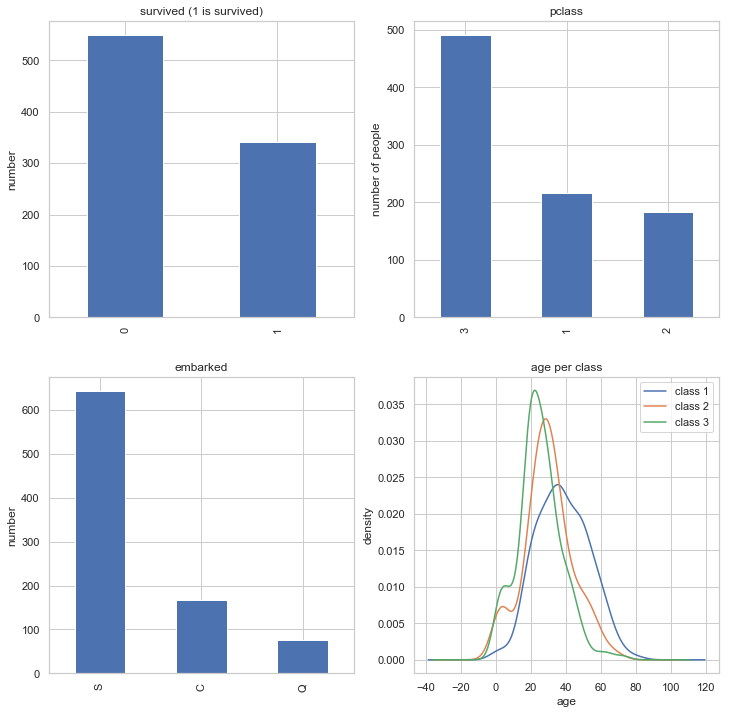

In [9]:
# analyser les donnees
fig = plt.figure()
fig.set_size_inches(12, 12) 

# survived about number of passagers
plt.subplot2grid((2,2),(0,0))  
train.Survived.value_counts().plot(kind='bar')
plt.title(u"survived (1 is survived)")
plt.ylabel(u"number")  

# Pclass about number of passagers
plt.subplot2grid((2,2),(0,1))  
train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"number of people")
plt.title(u"pclass")

# Embarked about number of passagers
plt.subplot2grid((2,2),(1,0))
train.Embarked.value_counts().plot(kind='bar')
plt.title(u"embarked")
plt.ylabel(u"number") 

# Age and Pclass about density of passagers
plt.subplot2grid((2,2),(1,1))
train.Age[train.Pclass == 1].plot(kind='kde')   
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"density") 
plt.title(u"age per class")
plt.legend((u'class 1', u'class 2',u'class 3'),loc='best')

plt.show()

- la plupard de passagers n'ont pas de chance d'etre sauves.
- beaucoup de passagers sont dans la classe 3.
- beaucoup de passagers sont embarques a partir de la porte S.
- age(class 1) > age(class 2) > age(class 3), les passagers les plus ages sont plus riches.

<Figure size 864x864 with 0 Axes>

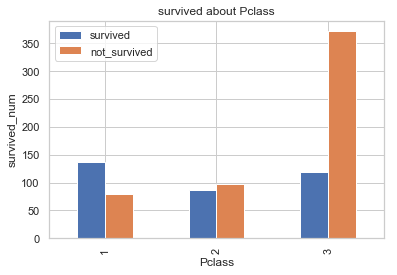

In [10]:
# survived about Pclass
fig = plt.figure()
fig.set_size_inches(12,12)

survived = train.Pclass[train.Survived == 1].value_counts()
non_survived = train.Pclass[train.Survived == 0].value_counts()
df = pd.DataFrame({u"survived":survived,u"not_survived":non_survived})

df.plot(kind="bar", stacked=False)
plt.title(u"survived about Pclass")
plt.xlabel(u"Pclass")
plt.ylabel(u"survived_num")

plt.show()

- plus des passagers sont survivants sur la classe 1 que les autres classes.

<Figure size 864x864 with 0 Axes>

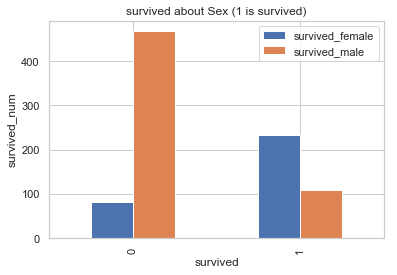

In [11]:
# survived about Sex
fig = plt.figure()
fig.set_size_inches(12,12)

survived_f = train.Survived[train.Sex == 'female'].value_counts()
survived_m = train.Survived[train.Sex == 'male'].value_counts()
df = pd.DataFrame({u"survived_female":survived_f,u"survived_male":survived_m})

df.plot(kind="bar", stacked = False)
plt.title("survived about Sex (1 is survived)")
plt.xlabel(u"survived")
plt.ylabel(u"survived_num")

plt.show()

- plus des passagers feminins sont survivantes que les passagers masculins.

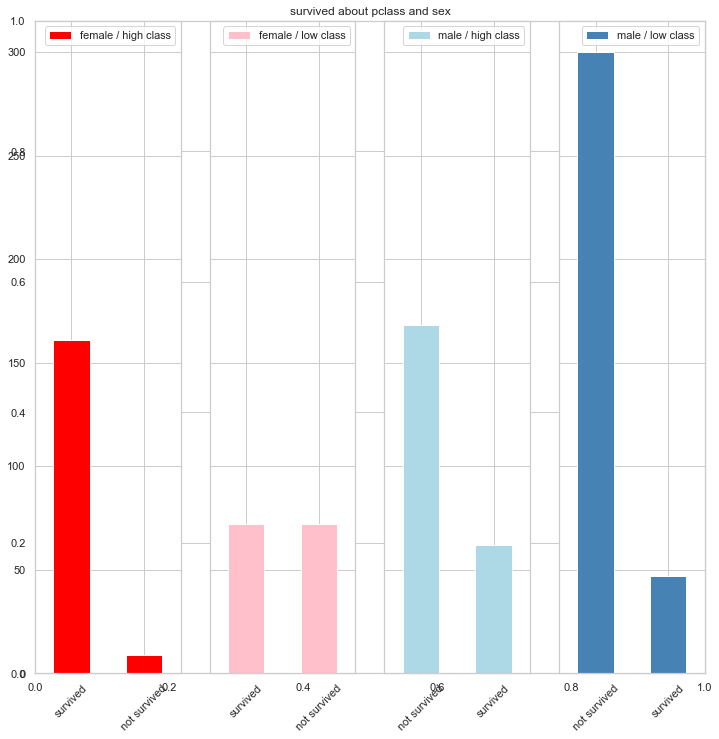

In [12]:
# survived about sex and pclass
fig = plt.figure()
fig.set_size_inches(12,12)
plt.title(u"survived about pclass and sex")

ax1 = fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(kind='bar',label="female high class", color = "red")
ax1.set_xticklabels([u"survived", u"not survived"], rotation = 45)
ax1.legend([u"female / high class"], loc="best")

ax2=fig.add_subplot(142, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"survived", u"not survived"], rotation=45)
plt.legend([u"female / low class"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"not survived", u"survived"], rotation=45)
plt.legend([u"male / high class"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"not survived", u"survived"], rotation=45)
plt.legend([u"male / low class"], loc='best')

plt.show()

- les passagers feminins dans la classe haute ont plus de chances d'etre sauvées.
- les passagers masculins dans n'importe quelle classe n'ont pas beaucoup de chances d'etre sauvees.

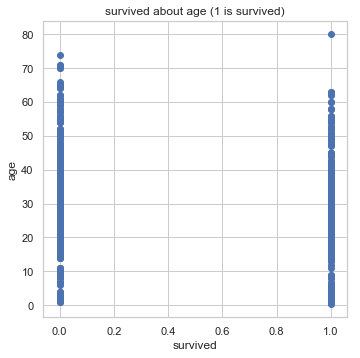

In [13]:
# survived about age
fig = plt.figure()
fig.set_size_inches(12,12)

plt.subplot2grid((2,2),(0,0))
plt.scatter(train.Survived, train.Age)
plt.ylabel(u"age")
plt.xlabel(u"survived")
plt.grid(b=True, which='major', axis='y') 
plt.title(u"survived about age (1 is survived)")
plt.show()

- Il ne montre pas beaucoup d'informations utiles.

In [14]:
# survived about family number (cousin / brother / sister)
g = train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

g = train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


- il n'y a pas beaucoup d'informations utiles.

In [15]:
train.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
E101               3
F2                 3
C22 C26            3
D                  3
F33                3
B28                2
B51 B53 B55        2
D26                2
C93                2
F4                 2
B49                2
C68                2
C125               2
E25                2
E67                2
C126               2
B57 B59 B63 B66    2
D33                2
B20                2
C92                2
D20                2
D36                2
E44                2
D35                2
B35                2
C52                2
B18                2
                  ..
E49                1
B19                1
C50                1
B3                 1
C47                1
A26                1
B102               1
A5                 1
B69                1
B73                1
B82 B84            1
E58                1
D30                1
C104               1
E10                1
C91                1
B101         

- il n'a pas beaucoup de loi.

<Figure size 432x288 with 0 Axes>

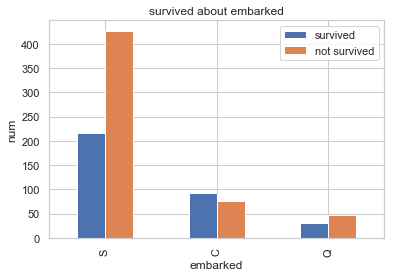

In [16]:
# survived bout embarked
fig = plt.figure()

survived = train.Embarked[train.Survived == 1].value_counts()
not_survived = train.Embarked[train.Survived == 0].value_counts()
df=pd.DataFrame({u'survived':survived, u'not survived':not_survived})
df.plot(kind='bar', stacked=False)

plt.title(u"survived about embarked")
plt.xlabel(u"embarked") 
plt.ylabel(u"num") 
plt.show()

- les passagers qui embarquent a partir de la porte C ont plus des chances d'etre sauvees.

**Data preprocessing**

In [17]:
test_PassengerId = test["PassengerId"]  # sauvegarder id pour soumettre les résultats finaux

# supprimer les champs inutils.
train.drop(['PassengerId', "Ticket", 'Cabin'], axis = 1, inplace = True)
test.drop(['PassengerId', "Ticket", 'Cabin'], axis=1, inplace = True)
train_test_data = [train, test] 

In [18]:
# Pclass
# correlation avec survived
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


- la coefficient sur la classe 1 est 0,63, ce qui represente que les passagers dans la classe 1 ont plus de chance d'etre sauves que les autres classes.

In [19]:
# Sex
# Transforme la variable categorique de sexe en valeur numérique discrete equivalente (sexe: masculin egal à 1 et feminin = 0).
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0}).astype(int)

In [20]:
train_test_data[0].head() # train data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


In [21]:
train_test_data[1].head()  # test data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S


In [22]:
# correlation avec survived
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Sex,Survived
1,1,0.188908
0,0,0.742038


- la coefficient de female est 0.74, ce que represente que les passagers feminins ont plus des chances d'etre sauves.

In [23]:
# Age
# remplir les valeurs null par la valeur median a la base de Sex et Pclass
age_fill = np.zeros((2,3)) # 2 for sex and 3 for Pclass
print(age_fill)

[[0. 0. 0.]
 [0. 0. 0.]]


In [24]:
for dataset in train_test_data:
    for s in range(0, 2):
        for p in range(0, 3):
            age_fill_df = dataset[(dataset['Sex'] == s) &\
                               (dataset['Pclass'] == p + 1)]['Age'].dropna()
            age_to_fill = age_fill_df.median() 

            # Convert random age float to nearest .5 age
            age_fill[s,p] = int( age_to_fill/0.5 + 0.5 ) * 0.5
            
    for s in range(0, 2):
        for p in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == s) & (dataset.Pclass == p + 1),\
                    'Age'] = age_fill[s,p]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,S


In [25]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",1,34,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",1,62,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",1,27,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,12.2875,S


In [26]:
# Diviser l'age en groupes de bins
min(train['Age']), max(train['Age'])

(0, 80)

In [27]:
# donc, on divise l'age en 8 bins
train['AgeBins'] = pd.cut(train['Age'], 8)

In [28]:
# correlation avec survived
train[['AgeBins', 'Survived']].groupby(['AgeBins'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,AgeBins,Survived
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000
2,"(20.0, 30.0]",0.322751
1,"(10.0, 20.0]",0.379310
4,"(40.0, 50.0]",0.392857
5,"(50.0, 60.0]",0.404762
3,"(30.0, 40.0]",0.448649
0,"(-0.08, 10.0]",0.593750


- la coefficient sur les ages < 10 ans est de 0.59, ce que represente que les enfants ont plus des chances d'etre sauves.

In [29]:
# transformer feature categorique Age en valeurs numeriques ordinales base sur AgeBins.
for dataset in train_test_data:    
    dataset.loc[dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 7

In [30]:
# on a plus besoin de AgeBins, supprimer-le alors
train = train.drop(['AgeBins'], axis = 1)
train_test_data = [train, test]
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,2,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,2,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,3,0,0,8.0500,S


In [31]:
# Family Size (SibSp + Parch)
# analyser s'il y a la correlation entre Family Size et Survived

# combiner SibSp et Parch
for dataset in train_test_data:
    dataset["FamilySize"] = dataset['SibSp'] + dataset['Parch']
train, test = train_test_data[0], train_test_data[1]
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",1,3,0,0,8.0500,S,0


In [32]:
# correlation avec Survived
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [33]:
# on a FamilySize, on supprime donc Parch et SibSp
train = train.drop(['Parch', 'SibSp'], axis = 1)
test = test.drop(['Parch', 'SibSp'], axis = 1)
train_test_data = [train, test]
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",1,3,8.0500,S,0


In [34]:
test.head()

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,3,"Kelly, Mr. James",1,3,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,4,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",1,6,9.6875,Q,0
3,3,"Wirz, Mr. Albert",1,2,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,2,12.2875,S,2


In [35]:
# Fare
Fare_freq = test.Fare.dropna().mode()[0]
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(Fare_freq)

In [36]:
# correlation avec Survived
train['FareBins'] = pd.qcut(train['Fare'], 5)
train[['FareBins', 'Survived']].groupby(['FareBins'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,FareBins,Survived
1,"(7.854, 10.5]",0.201087
0,"(-0.001, 7.854]",0.217877
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [37]:
#transformer en valeur ordinale base sur FareBins
for dataset in train_test_data:    
    dataset.loc[dataset['Fare']  <=7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.84)   & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5)   & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 5512.329), 'Fare'] = 4

In [38]:
train = train.drop(['FareBins'], axis = 1)
train_test_data = [train, test]

train.head(6)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,0.0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,4.0,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,1.0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,4.0,S,1
4,0,3,"Allen, Mr. William Henry",1,3,1.0,S,0
5,0,3,"Moran, Mr. James",1,2,1.0,Q,0


In [39]:
test.head(6)

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,3,"Kelly, Mr. James",1,3,0.0,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,4,0.0,S,1
2,2,"Myles, Mr. Thomas Francis",1,6,1.0,Q,0
3,3,"Wirz, Mr. Albert",1,2,1.0,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,2,2.0,S,2
5,3,"Svensson, Mr. Johan Cervin",1,1,1.0,S,0


In [40]:
# Embarked
# remplir les valeurs null avec la valeur la plus frequente.
Embarking_freq = train.Embarked.dropna().mode()[0]
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(Embarking_freq)
train, test = train_test_data[0], train_test_data[1]
train.head() 

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,0.0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,4.0,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,1.0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,4.0,S,1
4,0,3,"Allen, Mr. William Henry",1,3,1.0,S,0


In [41]:
# correlation avec Survived
train[['Embarked' , 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


- la coefficient de porte C est 0.55, ce que presente que les passagers ont embarque a partir de la porte C ont plus des chances d'etre sauves.

In [42]:
# transformer la valeur categorique Embarked en valeur numerique discrete (S = 0, C = 1, and Q = 2 )
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,0.0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,4.0,1,1
2,1,3,"Heikkinen, Miss. Laina",0,2,1.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,4.0,0,1
4,0,3,"Allen, Mr. William Henry",1,3,1.0,0,0


In [43]:
# supprimer le champ Name, car c'est pas utile pour entrainer le modele
train.drop(['Name'], axis = 1, inplace = True)
test.drop(['Name'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,2,0.0,0,1
1,1,1,0,3,4.0,1,1
2,1,3,0,2,1.0,0,0
3,1,1,0,3,4.0,0,1
4,0,3,1,3,1.0,0,0


**Heat map pour la correlation entre les features**

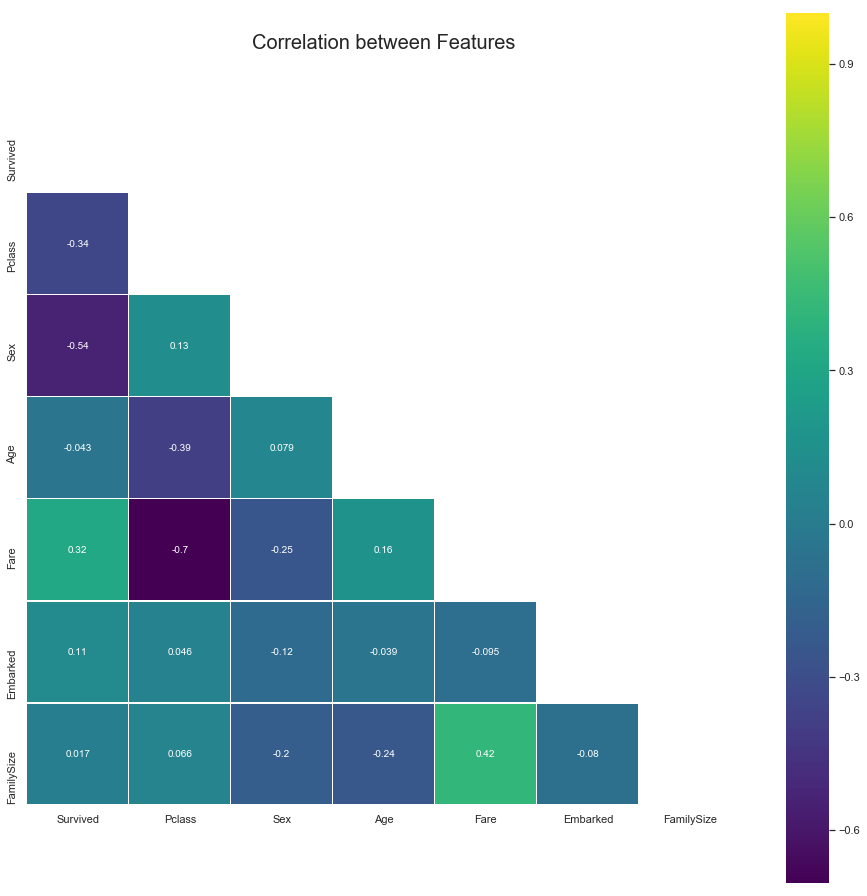

In [44]:
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Correlation between Features', y=1.05, size = 20)

# Generate a mask for the upper triangle
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# heatmap
sns.heatmap(train.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True,
           mask = mask)

- +Ve corrcoef signifie que les deux variables ont une relation lineaire +v et -ve moyenne, elles ont une relation lineaire -ve (pente = -ve), proche de zero, elles ne sont pas correlees, proches de +1 ou -1, elles sont fortement positives. et negativement correles, respectivement.

**Machine Learning Algorithms**

In [45]:
# label = Survived
# features = autres champs
# diviser dataset en train set et test set

y_train = train["Survived"]
X_train = train.drop(["Survived"], axis = 1 )

X_test = test
X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [46]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,1,2,0.0,0,1
1,1,0,3,4.0,1,1
2,3,0,2,1.0,0,0
3,1,0,3,4.0,0,1
4,3,1,3,1.0,0,0


1. Logistic Regression

In [47]:
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
LR_score = LR.score(X_train, y_train)
print("LR Accuracy  score = {:.2f}".format(LR_score*100))

LR Accuracy  score = 79.46


D:\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2. Support Vector Machine

In [48]:
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
SVC_score = svc.score(X_train, y_train)
print("SVC Accuracy  score = {:.2f}".format(SVC_score*100))

SVC Accuracy  score = 83.95


D:\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


3. Decision Tree

In [49]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_dt = DT.predict(X_test)
DT_score = DT.score(X_train, y_train)
print("Decision Tree accuracy score = {:.2f}".format(DT_score*100))

Decision Tree accuracy score = 89.00


4. Random Forest Regressor

In [50]:
RF = RandomForestRegressor(n_estimators = 1000)
RF.fit(X_train, y_train)
y_pred_rf = RF.predict(X_test)
RF_score = RF.score(X_train, y_train)
print("Random forest regressor accuracy score = {:.2f}".format(RF_score*100))

Random forest regressor accuracy score = 65.96


5. Neural Networks

In [51]:
# load up train / validation set! 
train_size = int(train.shape[0] * 0.85)

train_dataset = train[:train_size]
val_dataset = train[train_size:]

X_train = train_dataset.drop(labels=["Survived"], axis=1).values
Y_train = train_dataset["Survived"].values

X_val = val_dataset.drop(labels=["Survived"], axis=1).values
Y_val = val_dataset["Survived"].values

input_size = len(train_dataset.columns) - 1  # number of final features 

In [52]:
X_train = X_train.reshape((X_train.shape[1], X_train.shape[0]))
X_val = X_val.reshape((X_val.shape[1], X_val.shape[0]))

Y_train = Y_train.reshape((1, Y_train.shape[0]))
Y_val = Y_val.reshape((1, Y_val.shape[0]))

In [53]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape=[n_x, None])
    Y = tf.placeholder(tf.float32, shape=[n_y, None])
    return X, Y

def initialize_parameters():
    output_size = 1
    l1_size = 64 
    l2_size = 64 
    l3_size = output_size
    l4_size = output_size
    
    W1 = tf.get_variable("W1", [l1_size, input_size],
                         initializer=tf.contrib.layers.xavier_initializer()) # seed=1
    b1 = tf.get_variable("b1", [l1_size, 1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [l2_size, l1_size], 
                         initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [l2_size, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [l3_size, l2_size], 
                         initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [l3_size, 1], initializer=tf.zeros_initializer())
    W4 = tf.get_variable("W4", [l4_size, l3_size], 
                         initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.get_variable("b4", [l4_size, 1], initializer=tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4
                 }

    return parameters

In [54]:
def forward_propagation(X, parameters):
    """
    LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
    Z3 -- the output of the last LINEAR unit
    """
    # Retrieve the parameters from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']

    keep_prob = 0.7 #0.3  # if dropout too many, the predict result will be always 0
    Z1 = tf.add(tf.matmul(W1, X), b1)  # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.dropout(tf.nn.relu(Z1), keep_prob=keep_prob)  # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)  # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.dropout(tf.nn.relu(Z2), keep_prob=keep_prob)  # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)  # Z3 = np.dot(W3,Z2) + b3
    A3 = tf.nn.dropout(tf.nn.relu(Z3), keep_prob=keep_prob)  
    Z4 = tf.add(tf.matmul(W4, A3), b4)  

    return Z3

def forward_propagation_for_predict(X, parameters):
    """
    Returns: Z3 -- the output of the last LINEAR unit
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)  # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)  # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)  # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)  # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)  # Z3 = np.dot(W3,Z2) + b3
    A3 = tf.nn.relu(Z3)  # A2 = relu(Z2)
    Z4 = tf.add(tf.matmul(W4, A3), b4)  # Z3 = np.dot(W3,Z2) + b3

    return Z3

In [55]:
def compute_cost(Z3, Y):
    """
    Z3 -- output of forward propagation (output of the last LINEAR unit)
    Y -- "true" labels vector placeholder, same shape as Z3
    Return: cost - Tensor of the cost function
    """
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))
    return cost

In [56]:
from tensorflow.python.framework import ops

learning_rate=0.001
num_epochs=2000

ops.reset_default_graph()  # to be able to rerun the model without overwriting tf variables
(n_x, m) = X_train.shape  # (n_x: input size, m : number of examples in the train set)
n_y = Y_train.shape[0]  # n_y : output size
costs, val_losses = [], []  # To keep track of the cost

X, Y = create_placeholders(n_x, n_y)
parameters = initialize_parameters()

# Forward propagation: Build the forward propagation in the tensorflow graph
Z3 = forward_propagation(X, parameters)

# Cost function: Add cost function to tensorflow graph
cost = compute_cost(Z3, Y)
val_cost = compute_cost(forward_propagation_for_predict(X, parameters), Y)

# Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initialize all the variables
init = tf.global_variables_initializer()
# Start the session to compute the tensorflow graph
with tf.Session() as sess:
    sess.run(init)

    # Do the training loop
    for epoch in range(num_epochs):
        _, epoch_cost = sess.run([optimizer, cost],
                                 feed_dict={X: X_train, Y: Y_train})

        # Print the cost every epoch
        if epoch % 5 == 0:
            epoch_val_loss = sess.run(val_cost, feed_dict={X: X_val, Y: Y_val})

            val_losses.append(epoch_val_loss)
            costs.append(epoch_cost)

    # lets save the parameters in a variable
    parameters = sess.run(parameters)
    print ("Parameters have been trained!")

    # Calculate the correct predictions
    y_hat = tf.cast(tf.greater(tf.sigmoid(Z3),0.5), tf.float32)
    correct_prediction = tf.equal(y_hat, Y)

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    NN_score = accuracy.eval({X: X_train, Y: Y_train})

    print ("Train Accuracy: ", "{:3.2f}%".format(100*NN_score))
    print ("Test Accuracy:", "{:3.2f}%".format(100*accuracy.eval({X: X_val, Y: Y_val})))

Parameters have been trained!
Train Accuracy:  75.17%
Test Accuracy: 52.24%


**Evaluating**

In [57]:
Predictive_models = pd.DataFrame({
    'Model': ['LR', 'SVM', 'DT', 'RF', 'NN' ],
    'Score': [LR_score, SVC_score, DT_score, RF_score, NN_score]})

Predictive_models.sort_values(by ='Score', ascending=True)

,Model,Score
3,RF,0.659627
4,NN,0.751651
0,LR,0.794613
1,SVM,0.839506
2,DT,0.890011


- On trouve que le modele de Decision Tree obtient la meilleure note, donc, l'algorithme Decision Tree est selectionne.